## Clustering techniques

### Today I will write about the different ways to do clustering how it is done and why do we do it

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## K means clustering

It is an unsupervised learning technique and you set 3 random centroids first and then slowly find the center of the centroids

Application:
1) Marketing research - to groyup the different types of customers
2) Recommendation engine- to find groups of people who like the same type of things

### Approach

1) Data preparation:
- data scaling either using min-max scaling, decimal scaling or z-index scaling

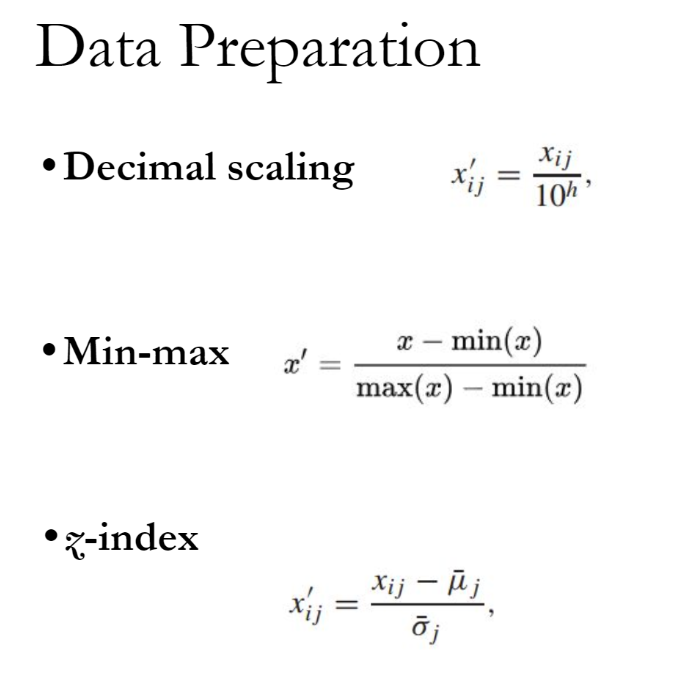

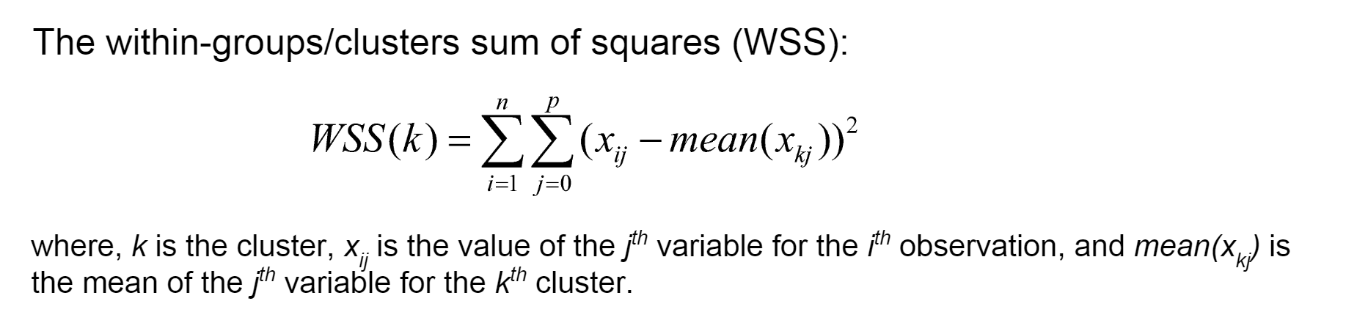

We choose random k number of centroids

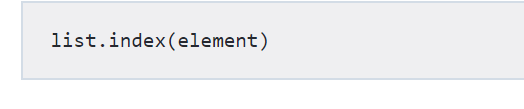


finds the index of an element

- Choose value for K
- Randomly select K featuresets to start as your centroids
- Calculate distance of all other featuresets to centroids
- Classify other featuresets as same as closest centroid
- Take mean of each class (mean of all featuresets by class),
- making that mean the new centroid
- Repeat steps 3-5 until optimized (centroids no longer moving)

8


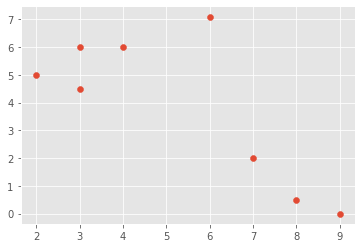

In [2]:
sample_data = np.array([[2,5],[4,6],[3,6],[7,2],[9,0],[3,4.5],[6,7.1],[8,0.5]])
print(sample_data.shape[0])
plt.scatter(sample_data[:,0],sample_data[:,1])

In [97]:
class K_means:
    
    #defining the k-means algorithim
    def __init__(self,k=2,tol=0.001,max_iter=100):
        # k is the number of centroids we want
        self.k = k
        
        # tol is the tolerance we can accept before we stop moving the centroid 
        self.tol = tol
        
        #max_iter we are willing to do
        self.max_iter = max_iter
        
    #now we need to define the fit algorithim
    def fit(self,data):
        
        # now we have to declare the centroids as dictionary
        self.centroids = []
        
        #lets pick first k points as centroid
        for x in range(self.k):
            self.centroids.append(data[x])
        print(self.centroids)
        
        #let us create a dictionary for the assignment of centroids
        self.assignment =[0]* len(data)
        
        for j in range(self.max_iter):   
            #we will only iterate for n number of iter
            
            #now, we have to find the distance between every data point and the centroid and then get the min distance as the centroid
            for i in range(len(data)):
                # recording the distance of the data point comapred to centroids
                distance = [np.linalg.norm(data[i]-centroid[datapoint]) for datapoint in range(len(centroid))]
                #print(distance)

                #assign the datapoint to the centroid
                self.assignment[i]= distance.index(min(distance))
                
            #now we calculate new mean of the centroid
            for k in range(len(sample_data)):
                if(self.assignment[k]==0):
                    featureset1.append(sample_data[k])
                else:
                    featureset2.append(sample_data[k])
                    
            # if the distance between old and new centroids is equal to or less than tol, break , else continue
            if(np.linalg.norm(centroid[0]-np.mean(featureset1,axis=0))<=self.tol and np.linalg.norm(centroid[1]-np.mean(featureset2,axis=0))<=self.tol):
               break
            # else, replace the old centroids with new centroids
            else:
               centroid[0] = np.mean(featureset1,axis=0)
               centroid[1] = np.mean(featureset2,axis=0)
        
            
        plt.scatter(data[:,0],data[:,1],c=self.assignment)     
        
        
        

[array([2., 5.]), array([4., 6.])]


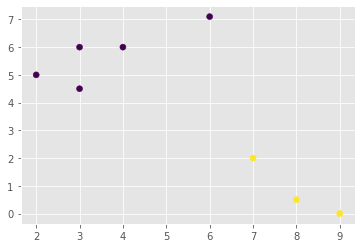

In [98]:
clf = K_means()
clf.fit(sample_data)